# Check CIFAR-10 Dataset

In [1]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from config import cfg

In [2]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [3]:
data1 = unpickle(cfg.data1)
data2 = unpickle(cfg.data2)
data3 = unpickle(cfg.data3)
data4 = unpickle(cfg.data4)
data5 = unpickle(cfg.data5)
labeldict = unpickle(cfg.labels)

print(data1.keys())
print(labeldict.keys())

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])
dict_keys([b'num_cases_per_batch', b'label_names', b'num_vis'])


In [4]:
print(data1.get(b'labels'))
print(data1.get(b'data'))
print(labeldict.get(b'label_names'))

[6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6, 4, 3, 6, 6, 2, 6, 3, 5, 4, 0, 0, 9, 1, 3, 4, 0, 3, 7, 3, 3, 5, 2, 2, 7, 1, 1, 1, 2, 2, 0, 9, 5, 7, 9, 2, 2, 5, 2, 4, 3, 1, 1, 8, 2, 1, 1, 4, 9, 7, 8, 5, 9, 6, 7, 3, 1, 9, 0, 3, 1, 3, 5, 4, 5, 7, 7, 4, 7, 9, 4, 2, 3, 8, 0, 1, 6, 1, 1, 4, 1, 8, 3, 9, 6, 6, 1, 8, 5, 2, 9, 9, 8, 1, 7, 7, 0, 0, 6, 9, 1, 2, 2, 9, 2, 6, 6, 1, 9, 5, 0, 4, 7, 6, 7, 1, 8, 1, 1, 2, 8, 1, 3, 3, 6, 2, 4, 9, 9, 5, 4, 3, 6, 7, 4, 6, 8, 5, 5, 4, 3, 1, 8, 4, 7, 6, 0, 9, 5, 1, 3, 8, 2, 7, 5, 3, 4, 1, 5, 7, 0, 4, 7, 5, 5, 1, 0, 9, 6, 9, 0, 8, 7, 8, 8, 2, 5, 2, 3, 5, 0, 6, 1, 9, 3, 6, 9, 1, 3, 9, 6, 6, 7, 1, 0, 9, 5, 8, 5, 2, 9, 0, 8, 8, 0, 6, 9, 1, 1, 6, 3, 7, 6, 6, 0, 6, 6, 1, 7, 1, 5, 8, 3, 6, 6, 8, 6, 8, 4, 6, 6, 1, 3, 8, 3, 4, 1, 7, 1, 3, 8, 5, 1, 1, 4, 0, 9, 3, 7, 4, 9, 9, 2, 4, 9, 9, 1, 0, 5, 9, 0, 8, 2, 1, 2, 0, 5, 6, 3, 2, 7, 8, 8, 6, 0, 7, 9, 4, 5, 6, 4, 2, 1, 1, 2, 1, 5, 9, 9, 0, 8, 4, 1, 1, 6, 3, 3, 9, 0, 7, 9, 7, 7, 9, 1, 5, 1, 6, 6, 8, 7, 1, 3, 0, 

In [5]:
CLASSES = {}
for i in range(10):
    CLASSES[i] = str(labeldict.get(b'label_names')[i])[2:-1]
print(CLASSES)

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


In [6]:
datas = np.concatenate((data1.get(b'data'),
                        data2.get(b'data'),
                        data3.get(b'data'),
                        data4.get(b'data'),
                        data5.get(b'data')), axis=0)
labels = np.concatenate((data1.get(b'labels'),
                         data2.get(b'labels'),
                         data3.get(b'labels'),
                         data4.get(b'labels'),
                         data5.get(b'labels')), axis=0)

print(datas.shape, labels.shape)

(50000, 3072) (50000,)


In [7]:
x_train = np.empty((50000, 3072))
x_train[:,:3072:3] = datas[:,:1024]
x_train[:,1:3072:3] = datas[:,1024:2048]
x_train[:,2:3072:3] = datas[:,2048:]

x_train = x_train.reshape(-1, 32, 32, 3).astype('float32') / 255.
y_train = labels.reshape(-1, 1)

print(x_train.shape, y_train.shape)

(50000, 32, 32, 3) (50000, 1)


In [8]:
testdata = unpickle(cfg.testdata)
x_testdata = testdata.get(b'data')
y_testdata = testdata.get(b'labels')
x_test = np.empty((10000, 3072))
y_test = np.zeros((10000, 1))
y_test[:,0] = y_testdata[:]
x_test[:,:3072:3] = x_testdata[:,:1024]
x_test[:,1:3072:3] = x_testdata[:,1024:2048]
x_test[:,2:3072:3] = x_testdata[:,2048:]
x_test = x_test.reshape(-1, 32, 32, 3).astype('float32') / 255.

Label:  [9] - truck


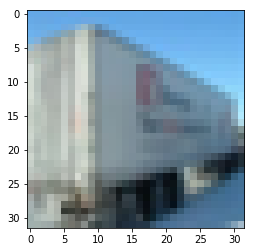

Label:  [ 0.] - airplane


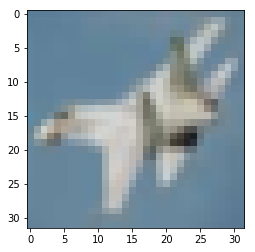

In [9]:
print("Label: ", y_train[15], '-', CLASSES[y_train[15][0]])
plt.imshow(x_train[15,:,:,:])
plt.show()

print("Label: ", y_test[10], '-', CLASSES[y_test[10][0]])
plt.imshow(x_test[10,:,:,:])
plt.show()